# Machine Learning

### Train ML algorithms for regression:

- Decision Tree
- Random Forest Regressor
- KNeighborsRegressor
- SVM

> make sure to add visualizations


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
google = pd.read_csv(r'Google Play Store Apps.zip')
apple = pd.read_csv(r'Apple App Store Apps.zip')
app_reviews = pd.read_csv('google_app_reviews.csv')

In [59]:
apple[apple['Average_User_Rating'].isna() == True].shape
# apple.head()

(0, 21)

In [17]:
print(google.shape, apple.shape, app_reviews.shape)
app_reviews.head()

(2312944, 24) (1230376, 21) (1131002, 7)


,Unnamed: 0,app_id,user_name,score,content,likes,polarity
0,0.0,com.phorest.barnetshair,Michela V,5,"Barnets will never let you down, great people....",0,0.322222
1,0.0,com.phorest.barnetshair,A Google user,5,Absolutely fantastic place!!!,0,0.781250
2,0.0,nl.haveaniceday.gaiazoo,Chris Breederveld,4,"Handige kaart met locatie, leuke quiz, maar he...",0,0.000000
3,0.0,nl.haveaniceday.gaiazoo,Fantom,2,Back button anywhere kills the app instead of ...,0,0.052381
4,0.0,nl.haveaniceday.gaiazoo,A Google user,2,Doet het niet,1,0.000000


In [48]:
review_google = app_reviews.join(google.set_index('App Id'), on='app_id')

In [49]:
all_apps = review_google.join(apple.set_index('App_Id'), on='app_id', lsuffix='_google', rsuffix='_apple')

In [9]:
# all_apps.head()
# all_apps.shape
# all_apps.columns
# all_apps.info()
# all_apps.describe()
# all_apps.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131002 entries, 0 to 1131001
Data columns (total 50 columns):
Unnamed: 0                 1131002 non-null float64
app_id                     1131002 non-null object
user_name                  1131002 non-null object
score                      1131002 non-null int64
content                    1131002 non-null object
likes                      1131002 non-null int64
polarity                   1131002 non-null float64
App Name                   1131002 non-null object
Category                   1131002 non-null object
Rating                     1129385 non-null float64
Rating Count               1129385 non-null float64
Installs                   1130300 non-null object
Minimum Installs           1130300 non-null float64
Maximum Installs           1131002 non-null int64
Free_google                1131002 non-null bool
Price_google               1131002 non-null float64
Currency_google            1130253 non-null object
Size               

#### select only relevant features

In [51]:
'''
Rating: overall app rating out of 5
Rating Count: how many people rated the app
Reviews: how many people wrote a review for the app
'''
features = ['app_id', 'Price_apple','Price_google','Minimum Installs', 'Maximum Installs', 'Rating','polarity','Rating Count', 'Size_Bytes', 'Reviews']
apps = all_apps[features]
# len(apps.app_id.unique()) # 42541
# apps.head(20)

apps[apps.isna().any(axis=1)]

,app_id,Price_apple,Price_google,Minimum Installs,Maximum Installs,Rating,polarity,Rating Count,Size_Bytes,Reviews
79883,com.mathtalk.measure,0.0,0.0,1.0,2,NaN,1.000000,NaN,581919744.0,11
120982,br.com.whirlpool.bblend,0.0,0.0,10000.0,24458,NaN,0.000000,NaN,83877888.0,2
120983,br.com.whirlpool.bblend,0.0,0.0,10000.0,24458,NaN,0.000000,NaN,83877888.0,2
120984,br.com.whirlpool.bblend,0.0,0.0,10000.0,24458,NaN,0.000000,NaN,83877888.0,2
120985,br.com.whirlpool.bblend,0.0,0.0,10000.0,24458,NaN,0.000000,NaN,83877888.0,2
120986,br.com.whirlpool.bblend,0.0,0.0,10000.0,24458,NaN,0.000000,NaN,83877888.0,2
127081,app.nticeme,0.0,0.0,100.0,188,NaN,0.508333,NaN,83665920.0,12
127082,app.nticeme,0.0,0.0,100.0,188,NaN,0.000000,NaN,83665920.0,12
127083,app.nticeme,0.0,0.0,100.0,188,NaN,0.000000,NaN,83665920.0,12
128484,com.hotchaipro.matchwords,0.0,0.0,NaN,5,NaN,-0.216667,NaN,152230912.0,429


So far the apps df has entries for user reviews and other general info such as overall app rating and size in bytes. In order to clean:

- groupby app_id and average the columns
- average apple and google price. remove columns
- average min and max installs. remove columns

In [28]:
apps = apps.groupby(['app_id']).mean()
apps.head(10)
# apps.shape # Correct 42541

,Price_apple,Price_google,Minimum Installs,Maximum Installs,Rating,polarity,Rating Count,Size_Bytes,Reviews
app_id,,,,,,,,,
a3.staffing.teammates,0.0,0.0,500.0,525,0.0,0.000000,0.0,3549184.0,0
ac.lite,0.0,0.0,1000000.0,2863010,4.1,0.023030,16677.0,105589760.0,85
ad.RailWiki,0.0,0.0,100.0,199,5.0,0.517929,111.0,17142784.0,0
ad.my.plan,0.0,0.0,5000.0,5468,3.4,0.240000,14.0,32883712.0,0
addvanz.piing,0.0,0.0,100.0,280,0.0,0.337500,0.0,56009728.0,8
advenworks.com.snakeblast,0.0,0.0,500000.0,507611,3.8,0.020089,8191.0,89121792.0,3565
ae.ac.sharjah.UOSmobile,0.0,0.0,1000.0,4996,3.8,0.236684,17.0,63631360.0,1
ae.admedia.adfm,0.0,0.0,1000.0,2892,4.7,0.000000,20.0,18083840.0,0
ae.admedia.qurankareem,0.0,0.0,5000.0,5524,4.5,0.250769,52.0,24304640.0,2


In [29]:
apps['price'] = (apps['Price_apple'] + apps['Price_google']) / 2
apps.drop(['Price_apple', 'Price_google'], axis=1, inplace=True)

apps['installs'] = (apps['Minimum Installs'] + apps['Maximum Installs']) / 2
apps.drop(['Minimum Installs', 'Maximum Installs'], axis=1, inplace=True)

In [31]:
# change size to MB
apps['size_mb'] = apps['Size_Bytes'] // 1000000
apps.drop(['Size_Bytes'], axis=1, inplace=True)

In [35]:
apps.rename(columns={"Rating": "avg_rating", 
                     "polarity": "avg_polarity", 
                     "Rating Count": "total_ratings", 
                     "Reviews": "total_reviews"},
           inplace=True)

In [45]:
# apps.head()
# apps.shape
# apps.columns
# apps.info()
# apps.describe()
# apps.corr()
# apps.dropna().shape
apps[apps.isna().any(axis=1)]

,avg_rating,avg_polarity,total_ratings,total_reviews,price,installs,size_mb
app_id,,,,,,,
ai.asaren.mobile,NaN,0.500000,NaN,0,0.0,14.5,39.0
app.momeditation,NaN,0.331893,NaN,177,0.0,15630.0,84.0
app.nticeme,NaN,0.169444,NaN,12,0.0,144.0,83.0
au.edu.uow.parking,NaN,0.043110,NaN,0,0.0,1889.0,2.0
br.com.whirlpool.bblend,NaN,0.000000,NaN,2,0.0,17229.0,83.0
com.MacacaGames.RhythmGo,NaN,0.230004,NaN,773,0.0,217.0,400.0
com.Moonee.Matchmania3d,NaN,0.227499,NaN,2183,0.0,10008.5,594.0
com.ParallelSpace.Inferno,NaN,-0.009649,NaN,60,0.0,NaN,427.0
com.RetrostyleGames.Vikings.valheim.survival,NaN,-0.162333,NaN,1,0.0,14791.5,318.0


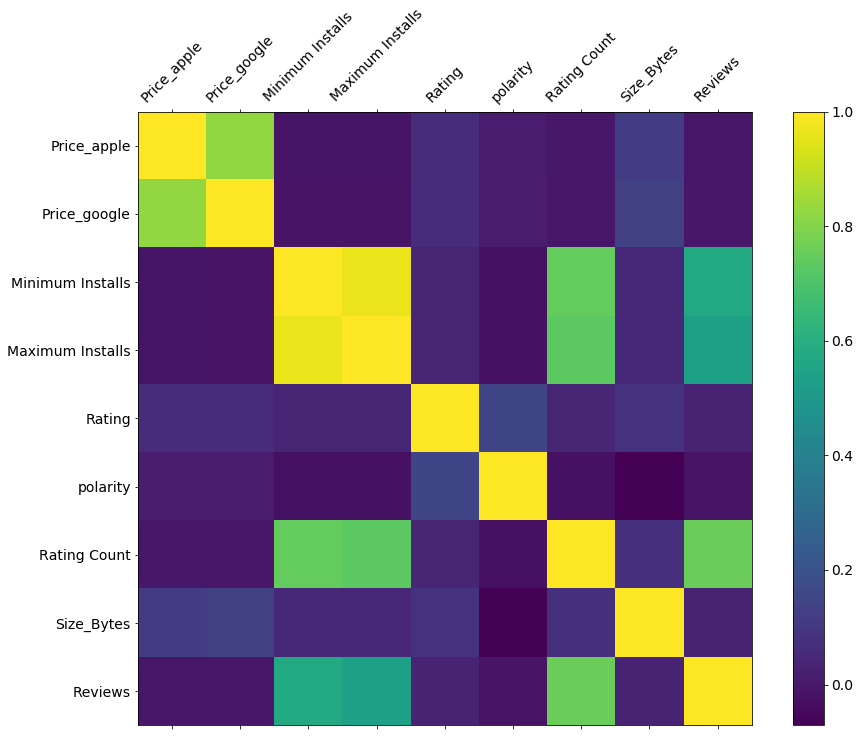

In [14]:
f = plt.figure(figsize=(15, 11))
plt.matshow(apps.corr(), fignum=f.number)

plt.xticks(range(apps.select_dtypes(['number']).shape[1]), apps.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(apps.select_dtypes(['number']).shape[1]), apps.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

plt.show()

In [30]:
all_apps = all_apps.dropna()

In [33]:
all_apps['price'] = (all_apps['Price_apple'] + all_apps['Price_google']) / 2


In [38]:
all_apps['price'].describe()

count    1.129285e+06
mean     2.358882e-01
std      1.373842e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.499000e+01
Name: price, dtype: float64

In [1]:
sns.countplot(x='price', data=all_apps)
plt.rcParams["figure.figsize"] = (50,20)
plt.xticks(rotation=45) 
plt.show()

NameError: name 'sns' is not defined

In [34]:
all_apps[all_apps['price'] > 0]

,Price_apple,Price_google,Minimum Installs,Maximum Installs,Rating,polarity,Rating Count,Size,Reviews,price
99,3.99,3.99,5000.0,9486,3.5,-0.041667,44.0,25M,45,3.99
100,3.99,3.99,5000.0,9486,3.5,0.043750,44.0,25M,45,3.99
101,3.99,3.99,5000.0,9486,3.5,0.700000,44.0,25M,45,3.99
102,3.99,3.99,5000.0,9486,3.5,0.050000,44.0,25M,45,3.99
103,3.99,3.99,5000.0,9486,3.5,0.000000,44.0,25M,45,3.99
104,3.99,3.99,5000.0,9486,3.5,0.000000,44.0,25M,45,3.99
105,3.99,3.99,5000.0,9486,3.5,0.191667,44.0,25M,45,3.99
106,3.99,3.99,5000.0,9486,3.5,0.350000,44.0,25M,45,3.99
107,3.99,3.99,5000.0,9486,3.5,0.000000,44.0,25M,45,3.99
108,3.99,3.99,5000.0,9486,3.5,0.333333,44.0,25M,45,3.99


## Take a sample 10% of population

In [15]:
app_sample = app_reviews.sample(frac=0.1, random_state=1)
app_sample.shape

(113100, 7)

In [2]:
google = pd.read_csv(r'Google Play Store Apps.zip')
apple = pd.read_csv(r'Apple App Store Apps.zip')

In [3]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230376 entries, 0 to 1230375
Data columns (total 21 columns):
App_Id                     1230376 non-null object
App_Name                   1230375 non-null object
AppStore_Url               1230376 non-null object
Primary_Genre              1230376 non-null object
Content_Rating             1230376 non-null object
Size_Bytes                 1230152 non-null float64
Required_IOS_Version       1230376 non-null object
Released                   1230373 non-null object
Updated                    1230376 non-null object
Version                    1230376 non-null object
Price                      1229886 non-null float64
Currency                   1230376 non-null object
Free                       1230376 non-null bool
DeveloperId                1230376 non-null int64
Developer                  1230376 non-null object
Developer_Url              1229267 non-null object
Developer_Website          586388 non-null object
Average_User_Rating   

In [4]:
google = google.dropna()
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287191 entries, 0 to 2312942
Data columns (total 24 columns):
App Name             1287191 non-null object
App Id               1287191 non-null object
Category             1287191 non-null object
Rating               1287191 non-null float64
Rating Count         1287191 non-null float64
Installs             1287191 non-null object
Minimum Installs     1287191 non-null float64
Maximum Installs     1287191 non-null int64
Free                 1287191 non-null bool
Price                1287191 non-null float64
Currency             1287191 non-null object
Size                 1287191 non-null object
Minimum Android      1287191 non-null object
Developer Id         1287191 non-null object
Developer Website    1287191 non-null object
Developer Email      1287191 non-null object
Released             1287191 non-null object
Last Updated         1287191 non-null object
Content Rating       1287191 non-null object
Privacy Policy       1287191 no

In [5]:
google = google[google['Size'] != 'Varies with device'] # remove 1637 rows

## Explore Dataset

In [6]:
# apps.describe()
# apps['Category'].unique()
# apps.info()
# apps.shape
google.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,...,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35


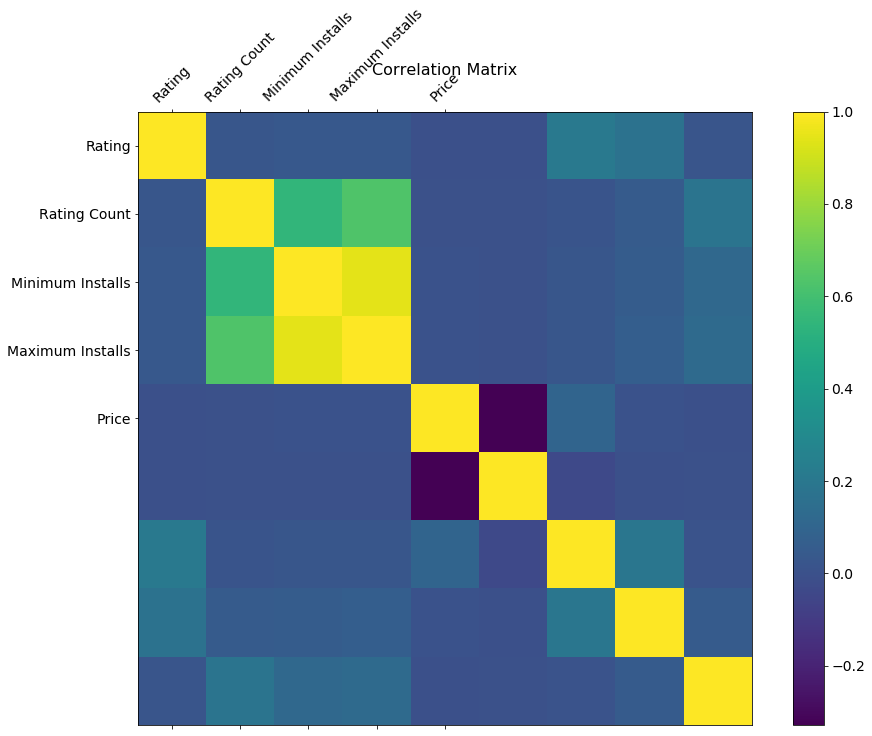

In [7]:
f = plt.figure(figsize=(15, 11))
plt.matshow(google.corr(), fignum=f.number)

plt.xticks(range(google.select_dtypes(['number']).shape[1]), google.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(google.select_dtypes(['number']).shape[1]), google.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

plt.show()

In [8]:
google.corr()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Ad Supported,In App Purchases,Editors Choice
Rating,1.000000,0.026513,0.034519,0.038121,-0.006073,-0.004614,0.208612,0.173305,0.022214
Rating Count,0.026513,1.000000,0.544825,0.633206,0.002626,-0.000956,0.017031,0.052832,0.181035
Minimum Installs,0.034519,0.544825,1.000000,0.947247,0.004802,-0.001626,0.025708,0.060292,0.117995
Maximum Installs,0.038121,0.633206,0.947247,1.000000,0.005280,-0.001791,0.028752,0.067439,0.132686
Free,-0.006073,0.002626,0.004802,0.005280,1.000000,-0.328889,0.099728,0.008368,-0.005543
Price,-0.004614,-0.000956,-0.001626,-0.001791,-0.328889,1.000000,-0.033710,-0.002524,0.000824
Ad Supported,0.208612,0.017031,0.025708,0.028752,0.099728,-0.033710,1.000000,0.191989,0.010792
In App Purchases,0.173305,0.052832,0.060292,0.067439,0.008368,-0.002524,0.191989,1.000000,0.051110
Editors Choice,0.022214,0.181035,0.117995,0.132686,-0.005543,0.000824,0.010792,0.051110,1.000000


# Select features and target

In [5]:
features = ['Rating Count', 'Size', 'Installs', 'Price']
y = google['Rating']
X = google[features]

## Format Columns

In [6]:
## TODO Later if needed
# def parse_date(obj):
#     obj_str = str(obj)
#     obj_str = obj_str.replace(',', '')
#     return obj_str
#     # mon_day_year = obj_str.split()

# all size in megabytes
def format_size(obj):
    obj_str = str(obj)
    if 'G' in obj_str:
        obj_str = obj_str.replace('G', '')
        obj_str = obj_str.replace(',', '')
        return float(obj_str) * 1000
    if 'M' in obj_str:
        obj_str = obj_str.replace('M', '')
        obj_str = obj_str.replace(',', '')
        return float(obj_str)
    obj_str = obj_str.replace('k', '')
    obj_str = obj_str.replace(',', '')
    return float(obj_str) / 1000

def format_installs(obj):
    obj_str = str(obj)
    obj_str = obj_str.replace('+', '')
    obj_str = obj_str.replace(',', '')
    return int(obj_str)

def format_price(obj):
    obj_str = str(obj)
    obj_str = obj_str.replace('$', '')
    return float(obj_str)

In [7]:
pd.options.mode.chained_assignment = None
# X['Reviews'] = pd.to_numeric(X['Reviews'])
X['Size'] = X['Size'].apply(format_size)
X['Installs'] = X['Installs'].apply(format_installs)
X['Price'] = X['Price'].apply(format_price)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250866 entries, 0 to 2312942
Data columns (total 4 columns):
Rating Count    1250866 non-null float64
Size            1250866 non-null float64
Installs        1250866 non-null int64
Price           1250866 non-null float64
dtypes: float64(3), int64(1)
memory usage: 47.7 MB


In [11]:
# sns.countplot(x='Category', data=X, palette="mako_r")
# plt.rcParams["figure.figsize"] = (30,5)
# plt.xticks(rotation=45) 
# plt.show()

In [12]:
# X[X['App'].str.contains('Be Like Bro - Compilation')]

In [13]:
X.describe()

,Rating Count,Size,Installs,Price
count,1.250866e+06,1.250866e+06,1.250866e+06,1.250866e+06
mean,3.196095e+03,2.144003e+01,1.616856e+05,1.070417e-01
std,1.159034e+05,2.573196e+01,4.191622e+06,2.426627e+00
min,0.000000e+00,3.300000e-03,0.000000e+00,0.000000e+00
25%,0.000000e+00,5.800000e+00,1.000000e+02,0.000000e+00
50%,7.000000e+00,1.200000e+01,5.000000e+02,0.000000e+00
75%,5.600000e+01,2.800000e+01,5.000000e+03,0.000000e+00
max,5.602542e+07,1.500000e+03,1.000000e+09,4.000000e+02


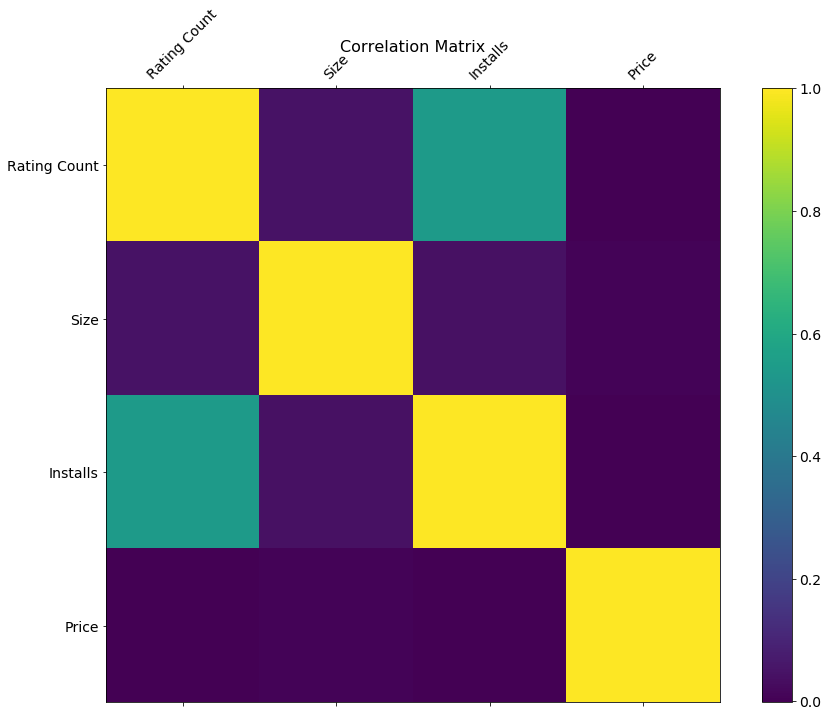

In [14]:
f = plt.figure(figsize=(15, 11))
plt.matshow(X.corr(), fignum=f.number)

plt.xticks(range(X.select_dtypes(['number']).shape[1]), X.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(X.select_dtypes(['number']).shape[1]), X.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

plt.show()

In [15]:
X.corr()

,Rating Count,Size,Installs,Price
Rating Count,1.000000,0.047485,0.544825,-0.000956
Size,0.047485,1.000000,0.044628,0.009313
Installs,0.544825,0.044628,1.000000,-0.001626
Price,-0.000956,0.009313,-0.001626,1.000000


In [16]:
y.shape

(1250866,)

In [17]:
X.shape

(1250866, 4)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [9]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250866 entries, 0 to 2312942
Data columns (total 4 columns):
Rating Count    1250866 non-null float64
Size            1250866 non-null float64
Installs        1250866 non-null int64
Price           1250866 non-null float64
dtypes: float64(3), int64(1)
memory usage: 47.7 MB


In [21]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)


scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in [40, 50, 60, 70, 80]}
best_tree_size = min(scores, key=scores.get)

In [22]:
best_tree_size

80

In [23]:
scores

{40: 0.2706506299651317,
 50: 0.2703769154729287,
 60: 0.2699339910095316,
 70: 0.26970235523626485,
 80: 0.2695716428173963}

In [24]:
# Define model
google_model = DecisionTreeRegressor(max_leaf_nodes=20, random_state = 1)
# Fit model
google_model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=20, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [25]:
# get predicted prices on validation data
val_predictions = google_model.predict(val_X)

mean_absolute_error(val_y, val_predictions)

0.272897458990008

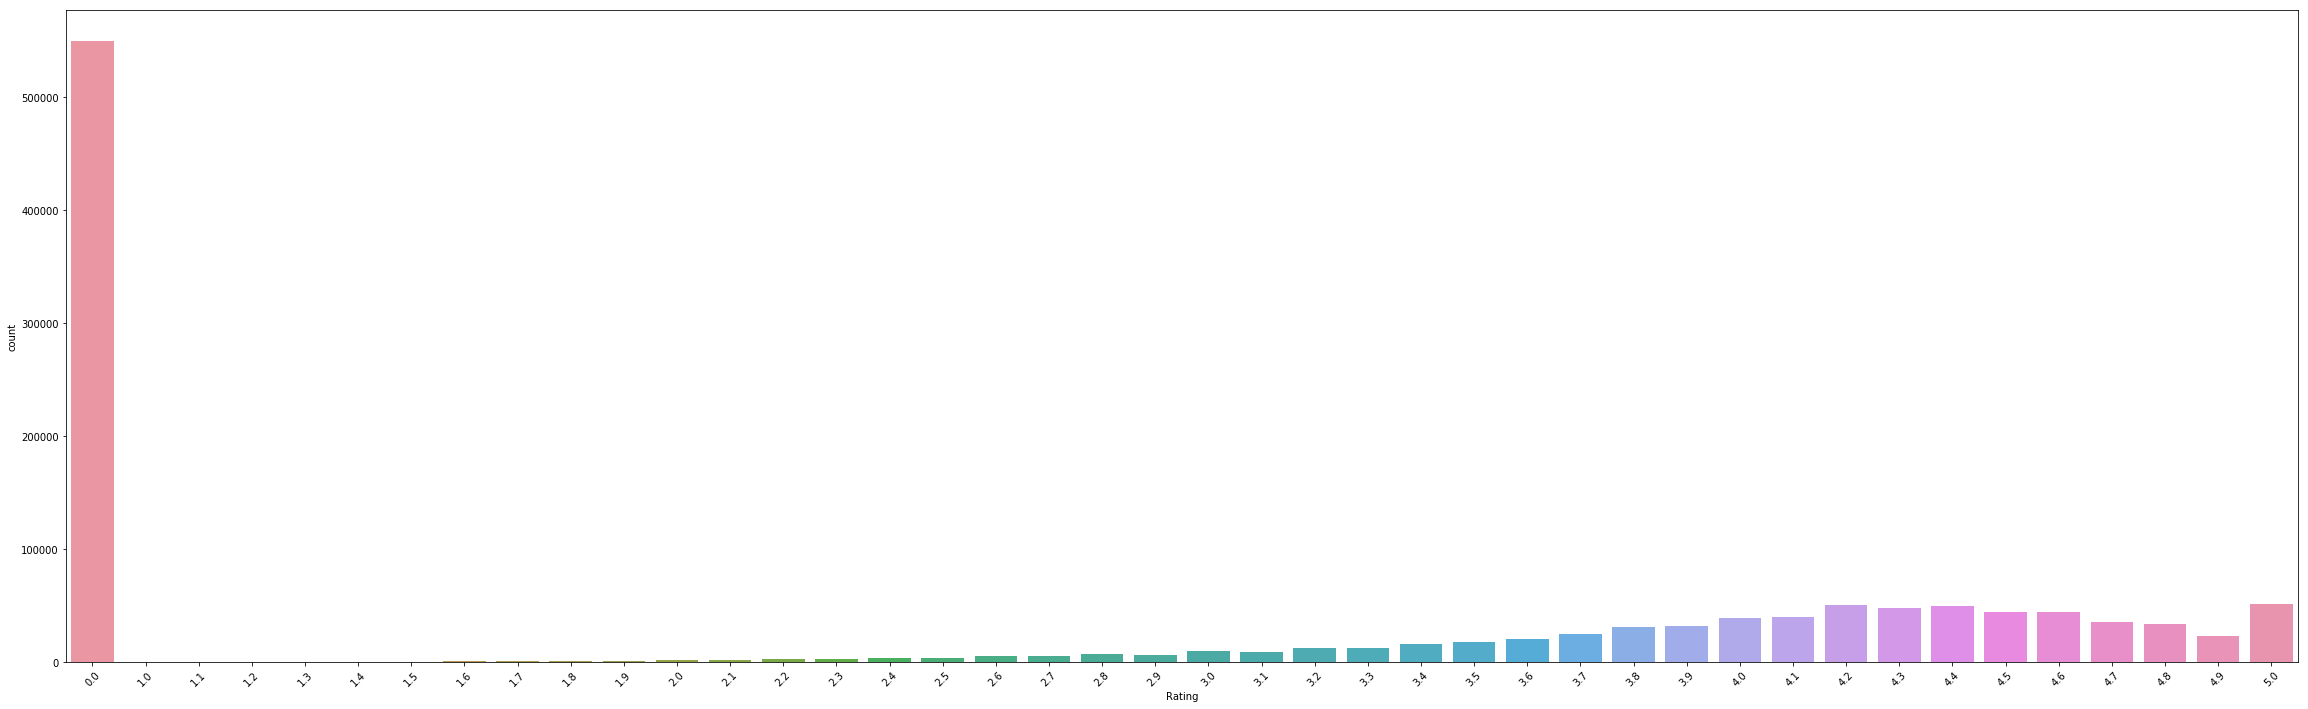

In [27]:
sns.countplot(x='Rating', data=google)
plt.rcParams["figure.figsize"] = (40,12)
plt.xticks(rotation=45) 
plt.show()

### As you see above, a LOT of apps have 0 rating. This has significantly skewed our result. Let's remove all apps with zero rating and try again.

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
google_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, google_preds))

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.29382233677459946


### Strange

After 10-15 minutes, decision tree returned a wrose absolute error in compare to decision tree.
A possible explanation could be that decision tree is overfitting with a high value of max_leaf_node.

It is important to note that more training data has made the model more robust. Previous dataset, googleplaystore.csv , had ~7K rows but the new dataset, Google Play Store Apps.zip , has ~1.2Million rows 

In [30]:
y.describe()

count    1.250866e+06
mean     2.292478e+00
std      2.094201e+00
min      0.000000e+00
25%      0.000000e+00
50%      3.200000e+00
75%      4.300000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [31]:
val_X.describe()

,Rating Count,Size,Installs,Price
count,3.127170e+05,312717.000000,3.127170e+05,312717.000000
mean,3.475594e+03,21.484613,1.577459e+05,0.104576
std,1.661351e+05,25.986600,3.899359e+06,2.524362
min,0.000000e+00,0.006300,0.000000e+00,0.000000
25%,0.000000e+00,5.800000,1.000000e+02,0.000000
50%,7.000000e+00,12.000000,5.000000e+02,0.000000
75%,5.600000e+01,28.000000,5.000000e+03,0.000000
max,5.602542e+07,1500.000000,1.000000e+09,399.990000


# Making actual predictions on google play store 🔮

In [32]:
d = {'Rating Count': [12], 'Size': [5], 'Installs': [500], 'Price': [500]}

df = pd.DataFrame(data=d)

In [33]:
forest_model.predict(df)

array([4.18])

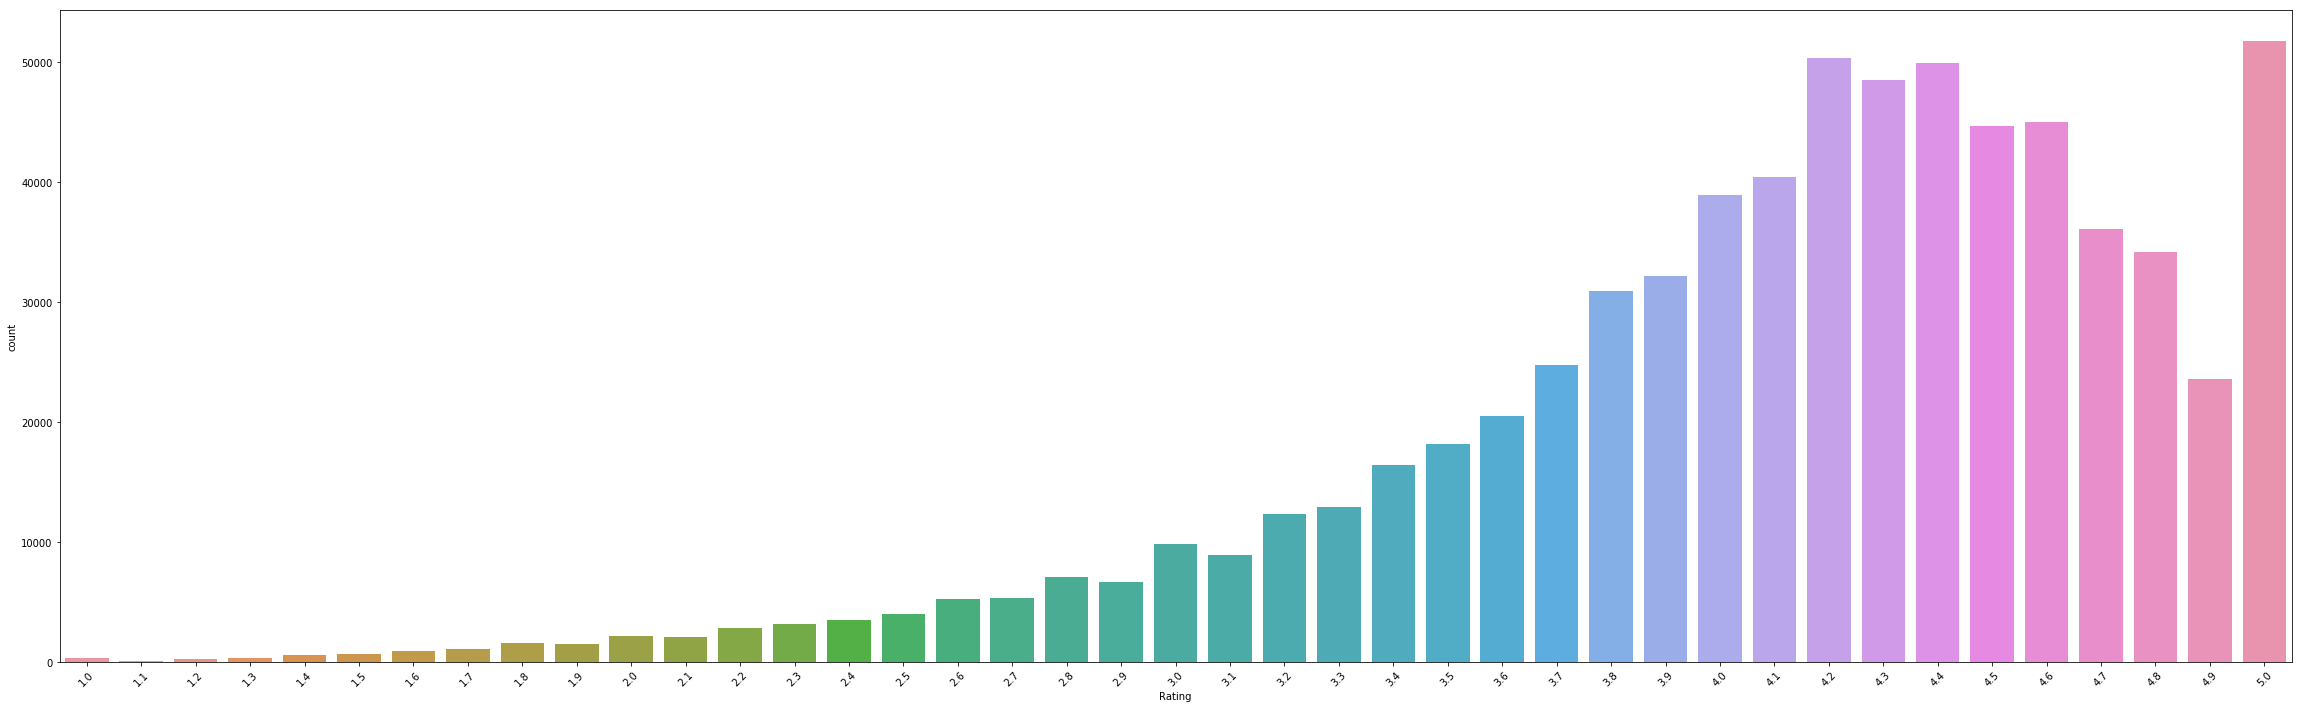

In [34]:
google = google[google['Rating'] > 0]

sns.countplot(x='Rating', data=google)
plt.rcParams["figure.figsize"] = (40,12)
plt.xticks(rotation=45) 
plt.show()


# Decision Tree: apps with > 0 rating

In [35]:
y = google['Rating']
X = google[features]

pd.options.mode.chained_assignment = None
X['Size'] = X['Size'].apply(format_size)
X['Installs'] = X['Installs'].apply(format_installs)
X['Price'] = X['Price'].apply(format_price)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

# Define model
app_model = DecisionTreeRegressor(max_leaf_nodes=40, random_state = 1)
# Fit model
app_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = app_model.predict(val_X)

print(mean_absolute_error(val_y, val_predictions))

app_model.score(val_X, val_y)

0.48296996831144134


0.12538901661071955

# Random Forest: apps with > 0 rating

In [36]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
app_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, app_preds))

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5251834972348882


In [37]:
d = {'Rating Count': [40], 'Size': [19], 'Installs': [100000], 'Price': [0]}
df = pd.DataFrame(data=d)
forest_model.predict(df)

array([3.97833333])

# very low score 🚩 

In [38]:
forest_model.score(val_X, val_y)

-0.03577972959204567

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=9)
)
model.fit(train_X, train_y)
print(model.score(val_X, val_y))

# Support Vector Machine SVM

In [ ]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(train_X, train_y)

In [ ]:
predictionsSVM = regr.predict(val_X)
mean_absolute_error(val_y, predictionsSVM)